## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Simple Combination

In [2]:
def combine_two_color_images(image1, image2):

    foreground, background = image1.copy(), image2.copy()
    
    foreground_height = foreground.shape[0]
    foreground_width = foreground.shape[1]
    alpha =0.5
    
    
    # do composite on the upper-left corner of the background image.
    blended_portion = cv2.addWeighted(foreground,
                alpha,
                background[:foreground_height,:foreground_width,:],
                1 - alpha,
                0,
                background)
    
    background[:foreground_height,:foreground_width,:] = blended_portion
    return background

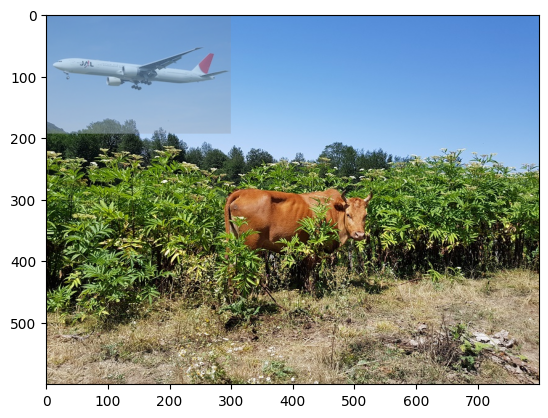

In [4]:
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/input.jpg")

result = combine_two_color_images(src, dst)
plt.imshow(result[...,::-1])

## 3- Creating Mask

Text(0.5, 1.0, 'mask')

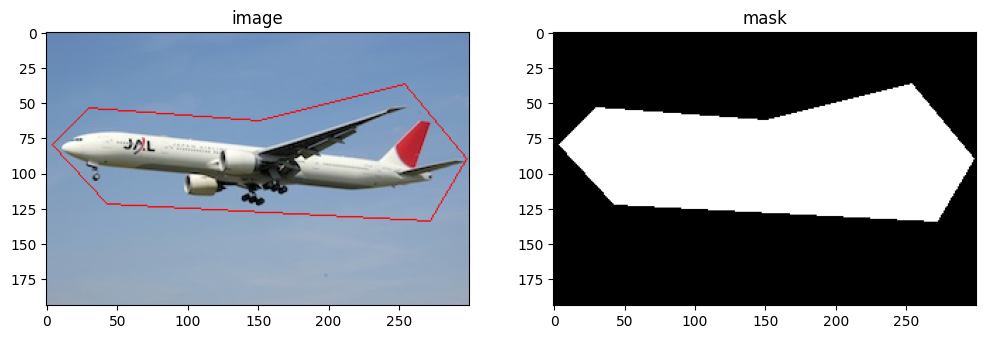

In [5]:
src = cv2.imread("images/airplane.jpg")
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.polylines(src, [poly],1, (0, 0, 255))

src_mask = np.zeros(src.shape, src.dtype)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(src_mask[...,::-1]);plt.title("mask")

## 4- Seamless Clone

- Example 1

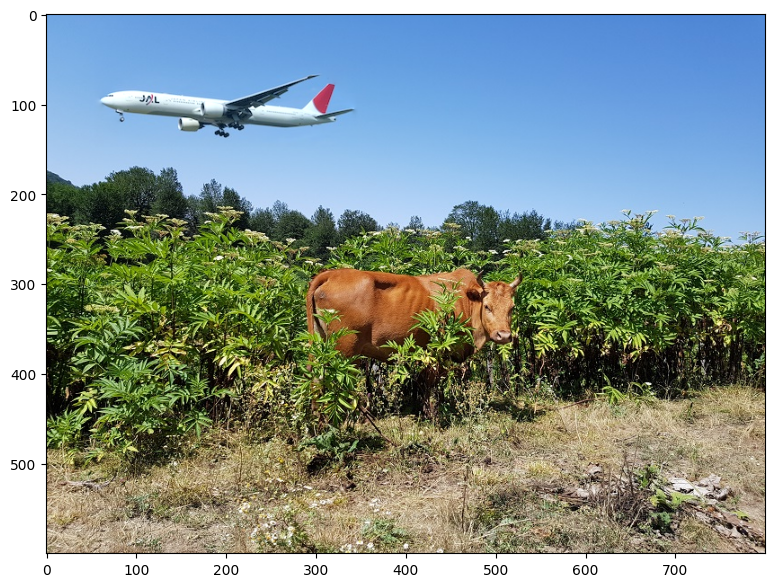

In [11]:
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/input.jpg")

# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122]], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (200,100)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=[12,7])
plt.imshow(output[...,::-1])

- Example 2

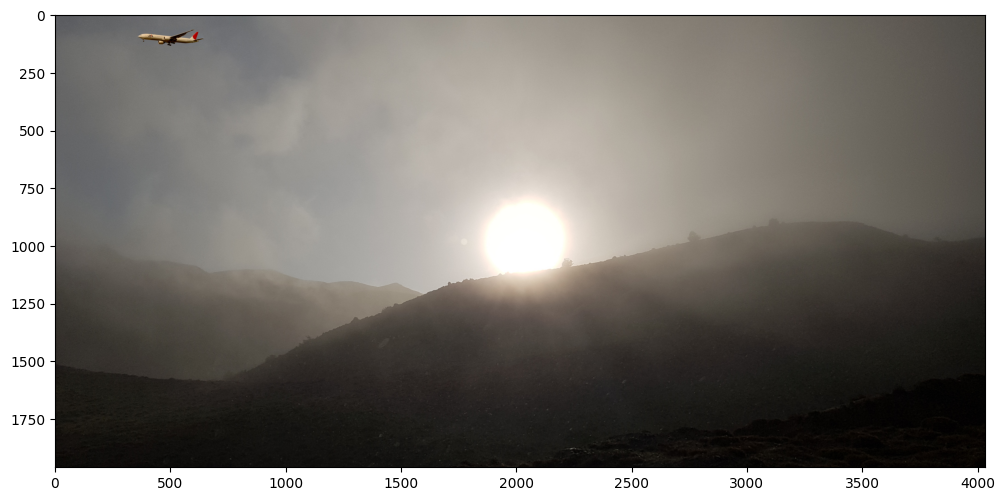

In [13]:
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/aa.jpg")

# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122]], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (500,100)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=[12,7])
plt.imshow(output[...,::-1])

## 5- Mixed vs Normal Cloning

- Example 1

Text(0.5, 1.0, 'Mixed Clone')

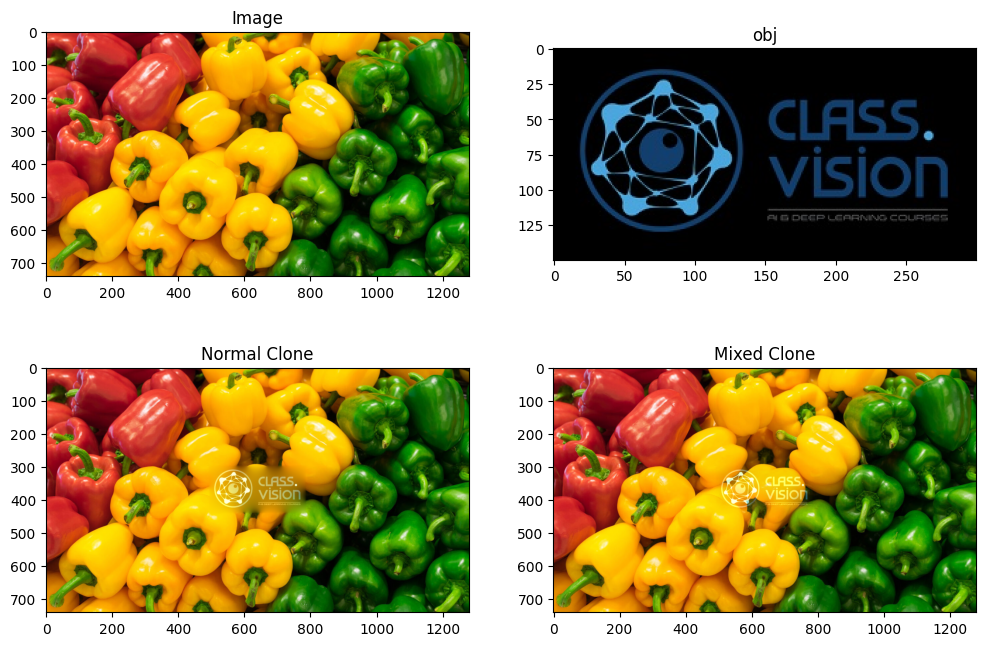

In [17]:
# Read images : src image will be cloned into dst
im = cv2.imread("images/felfel-dolme.jpg")
obj= cv2.imread("images/class.vision.jpg")

# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

# The location of the center of the src in the dst
width, height, channels = im.shape
center = (int(height/2), int(width/2))

# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

plt.figure(figsize=[12,8])
plt.subplot(221);plt.imshow(im[...,::-1]);plt.title("Image")
plt.subplot(222);plt.imshow(obj[...,::-1]);plt.title("obj")
plt.subplot(223);plt.imshow(normal_clone[...,::-1]);plt.title("Normal Clone")
plt.subplot(224);plt.imshow(mixed_clone[...,::-1]);plt.title("Mixed Clone")

- Example 2

Text(0.5, 1.0, 'Mixed Clone')

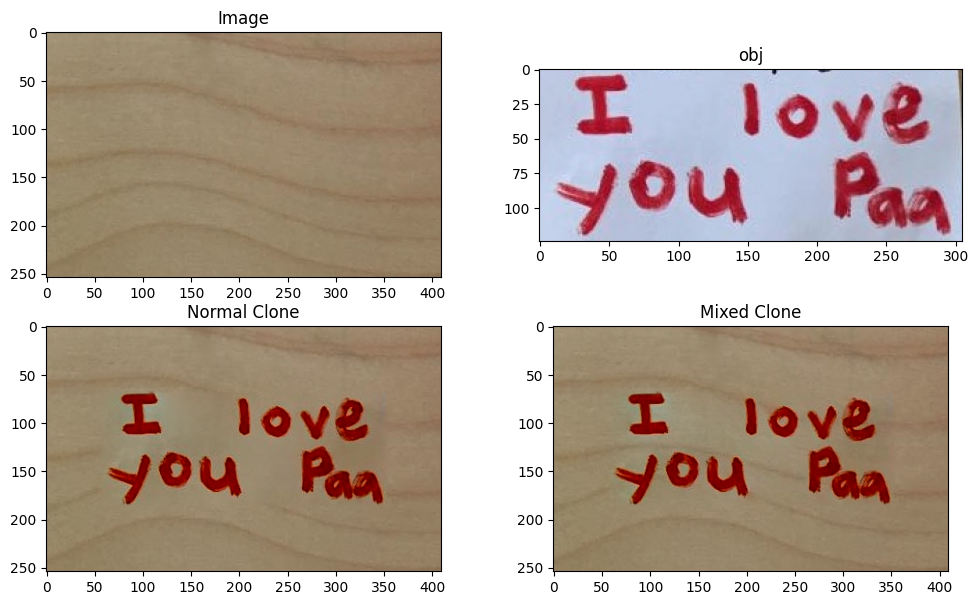

In [20]:
# Read images : src image will be cloned into dst
img = cv2.imread("images/wood-texture.jpg")
obj= cv2.imread("images/iloveyouticket.jpg")

# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

# The location of the center of the src in the dst
width, height, channels = img.shape
center = (int(height/2), int(width/2))

# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, img, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, img, mask, center, cv2.MIXED_CLONE)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(img[...,::-1]);plt.title("Image")
plt.subplot(222);plt.imshow(obj[...,::-1]);plt.title("obj")
plt.subplot(223);plt.imshow(normal_clone[...,::-1]);plt.title("Normal Clone")
plt.subplot(224);plt.imshow(mixed_clone[...,::-1]);plt.title("Mixed Clone")